In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("main_data.csv")

In [4]:
pre_event_data = data.iloc[:, 2:9]
post_event_data =  pd.concat([data.iloc[:, 2:5], data.iloc[:, 9:]], axis = 1)

In [5]:
Gender = {0:"Male",1:"Female"}
Maritial_status = {0:"Unmarried",1:"Married",2:"Seprated",3:"Widow",4:"Hermit"}


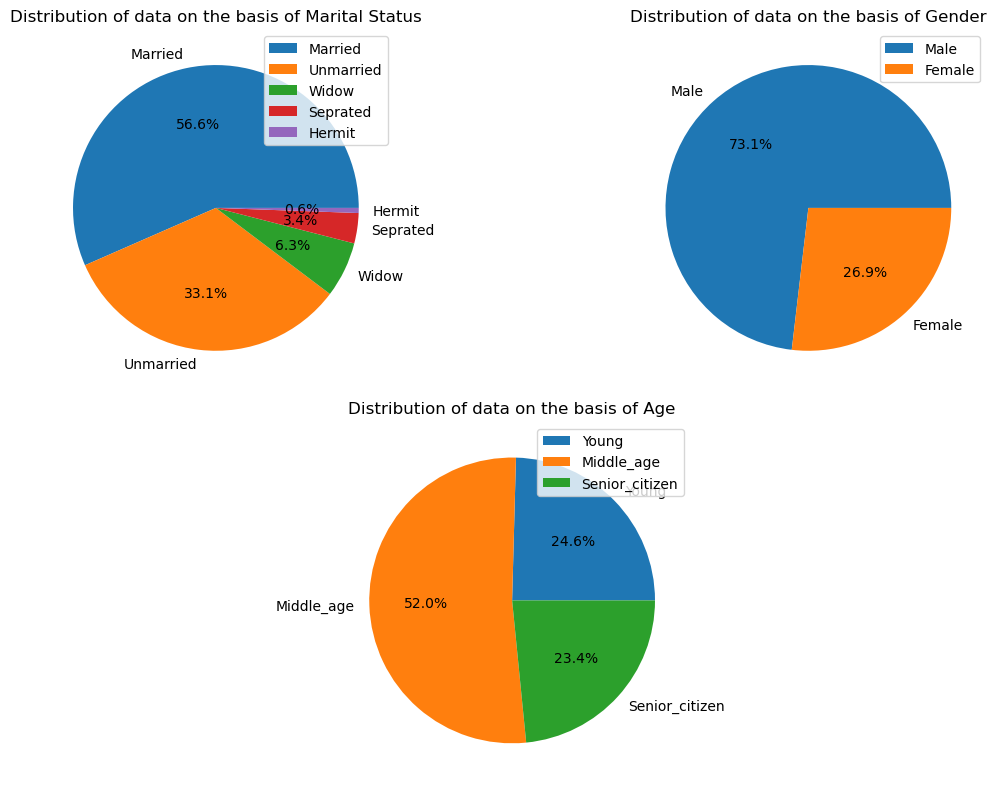

In [6]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)  
Maritial_status_data = pre_event_data["Marital Status"].value_counts()
Labels = [Maritial_status[x] for x in Maritial_status_data.keys()]
plt.pie(Maritial_status_data.values,labels=Labels,autopct='%1.1f%%')
plt.title("Distribution of data on the basis of Marital Status")
plt.legend(loc='upper right')

plt.subplot(2, 2, 2)  
gender_data = pre_event_data["Gender"].value_counts()
Labels = [Gender[x] for x in gender_data.keys()]
plt.pie(gender_data.values,labels=Labels,autopct='%1.1f%%')
plt.title("Distribution of data on the basis of Gender")
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)  
age_data = {"Young":0,"Middle_age":0,"Senior_citizen":0}
for age in pre_event_data["Age"]:
    if age>=18 and age<30: age_data["Young"]+=1
    elif age>=30 and age<50: age_data["Middle_age"]+=1
    else: age_data["Senior_citizen"]+=1

plt.pie(age_data.values(),labels=age_data.keys(),autopct='%1.1f%%')
plt.title("Distribution of data on the basis of Age")
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [7]:
def physical_health_div(mode,column):
    physical_health = []
    if mode == "pre": iterator = pre_event_data[column]
    if mode == "post": iterator = post_event_data[column]
    for points in iterator:
        if points>=0 and points<25: physical_health.append("Very_lazy")
        elif points>=25 and points<30: physical_health.append('Lazy')
        elif points>=30 and points<35: physical_health.append('Satisfactory')
        elif points>=35 and points<40: physical_health.append('Active')
        else: physical_health.append('Very_active')
    return physical_health

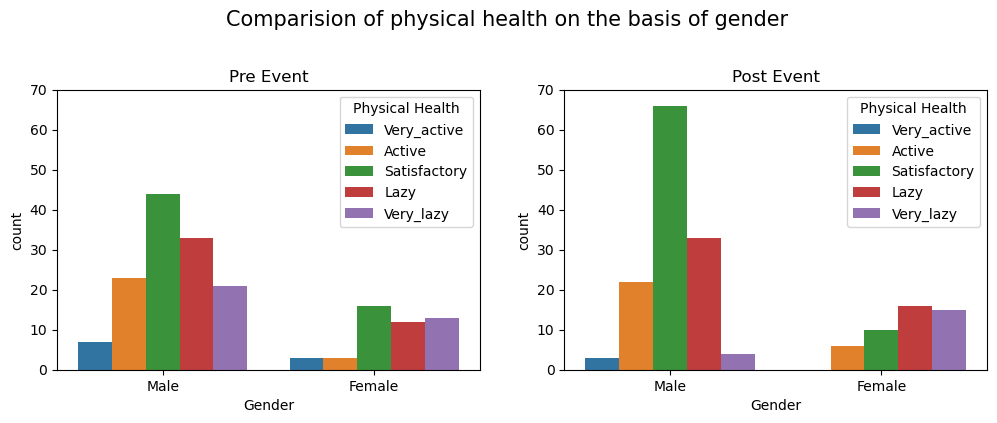

In [8]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.suptitle("Comparision of physical health on the basis of gender",fontsize=15)
color_dic = {"Very_active": "C0", "Active": "C1", "Satisfactory": "C2", "Lazy": "C3","Very_lazy":"C4"}
order = ["Very_active", "Active", "Satisfactory", "Lazy","Very_lazy"]
physical_health_data_pre = {"Gender": pre_event_data["Gender"],"Physical Health":physical_health_div("pre","Physical Health")}
physical_health_data_pre = pd.DataFrame(physical_health_data_pre)
fig = sns.countplot(x="Gender", data=physical_health_data_pre,  hue='Physical Health',palette=color_dic, hue_order=order)
fig.set_ylim([0,70])
fig.set_title('Pre Event') 
fig.set_xticklabels(["Male","Female"])

plt.subplot(2, 2, 2)
physical_health_data_post = {"Gender": post_event_data["Gender"],"Physical Health":physical_health_div("post","Physical Health.1")}
physical_health_data_post = pd.DataFrame(physical_health_data_post)
fig = sns.countplot(x="Gender", data=physical_health_data_post, hue='Physical Health',palette=color_dic, hue_order=order)
fig.set_title('Post Event') 
fig.set_ylim([0,70])
fig.set_xticklabels(["Male","Female"])
plt.show()

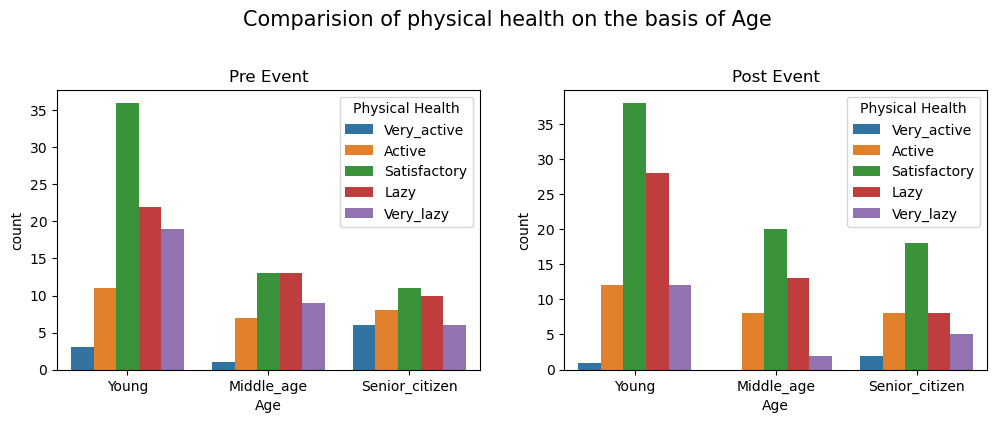

In [9]:
age_div = []
for age in pre_event_data["Age"]:
    if age>=18 and age<30: age_div.append("Young_age")
    elif age>=30 and age<50: age_div.append("Middle_age")
    else: age_div.append("Senior_citizen")

color_dic = {"Very_active": "C0", "Active": "C1", "Satisfactory": "C2", "Lazy": "C3","Very_lazy":"C4"}
order = ["Very_active", "Active", "Satisfactory", "Lazy","Very_lazy"]
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.suptitle("Comparision of physical health on the basis of Age",fontsize=15)
physical_health_data_pre = {"Age":age_div,"Physical Health":physical_health_div("pre","Physical Health")}
physical_health_data_pre = pd.DataFrame(physical_health_data_pre)
fig = sns.countplot(x="Age", data=physical_health_data_pre, palette=color_dic ,hue='Physical Health', hue_order=order)
fig.set_title('Pre Event') 
fig.set_xticklabels(["Young","Middle_age","Senior_citizen"])

plt.subplot(2, 2, 2)
physical_health_data_post = {"Age": age_div,"Physical Health":physical_health_div("post","Physical Health.1")}
physical_health_data_post = pd.DataFrame(physical_health_data_post)
fig = sns.countplot(x="Age", data=physical_health_data_post, palette=color_dic ,hue='Physical Health', hue_order=order)
fig.set_title('Post Event') 
fig.set_xticklabels(["Young","Middle_age","Senior_citizen"])
plt.show()

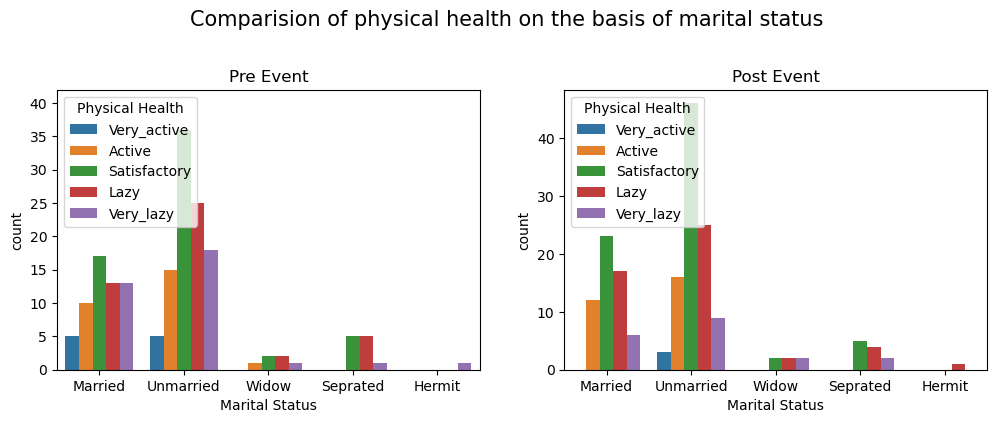

In [10]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.suptitle("Comparision of physical health on the basis of marital status",fontsize=15)
color_dic = {"Very_active": "C0", "Active": "C1", "Satisfactory": "C2", "Lazy": "C3","Very_lazy":"C4"}
order = ["Very_active", "Active", "Satisfactory", "Lazy","Very_lazy"]
physical_health_data_pre = {"Marital Status":pre_event_data["Marital Status"],"Physical Health":physical_health_div("pre","Physical Health")}
physical_health_data_pre = pd.DataFrame(physical_health_data_pre)
fig = sns.countplot(x="Marital Status", data=physical_health_data_pre, palette=color_dic,hue='Physical Health',hue_order=order)
fig.set_ylim([0,42])
fig.set_title('Pre Event') 
fig.set_xticklabels(["Married","Unmarried","Widow","Seprated","Hermit"])

plt.subplot(2, 2, 2)
physical_health_data_post = {"Marital Status":post_event_data["Marital Status"],"Physical Health":physical_health_div("post","Physical Health.1")}
physical_health_data_post = pd.DataFrame(physical_health_data_post)
fig = sns.countplot(x="Marital Status", data=physical_health_data_post, palette=color_dic,hue='Physical Health',hue_order=order)
fig.set_title('Post Event') 
fig.set_xticklabels(["Married","Unmarried","Widow","Seprated","Hermit"])
plt.show()

In [11]:
def psychiological_health_div(mode,column):
    psychiological_health = []
    if mode == "pre": iterator = pre_event_data[column]
    if mode == "post": iterator = post_event_data[column]
    for points in iterator:
        if points>=0 and points<15: psychiological_health.append("Depression")
        elif points>=15 and points<20: psychiological_health.append('Anxiety')
        elif points>=20 and points<25: psychiological_health.append('Satisfied')
        elif points>=25 and points<35: psychiological_health.append('Good')
        else: psychiological_health.append('Very_Good')
    return psychiological_health

color_dic = {"Very_Good": "C5", "Good": "C6", "Satisfied": "C7", "Anxiety": "C8","Depression":"C9"}
order = ["Very_Good", "Good", "Satisfied", "Anxiety","Depression"]

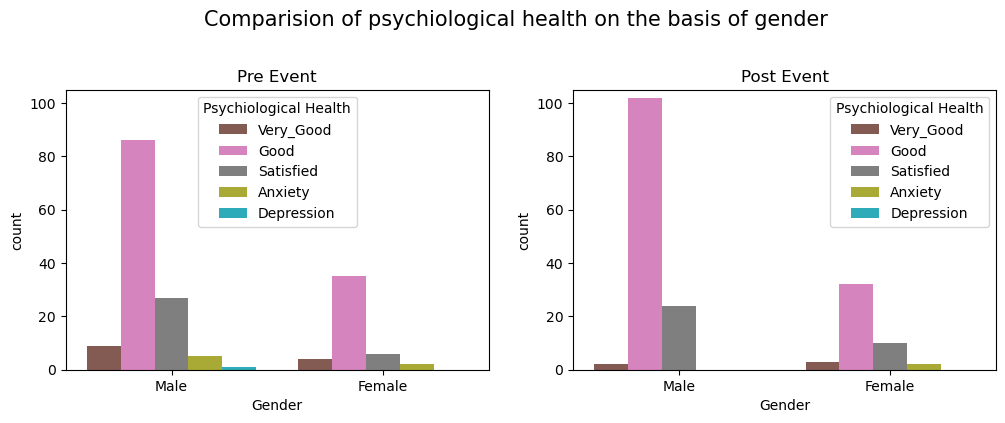

In [12]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.suptitle("Comparision of psychiological health on the basis of gender",fontsize=15)
psychiological_health_data_pre = {"Gender": pre_event_data["Gender"],"Psychiological Health":psychiological_health_div("pre","Psychiological Health")}
psychiological_health_data_pre = pd.DataFrame(psychiological_health_data_pre)
fig = sns.countplot(x="Gender", data=psychiological_health_data_pre, palette=color_dic,hue='Psychiological Health',hue_order=order)
fig.set_ylim([0,105])
fig.set_title('Pre Event') 
fig.set_xticklabels(["Male","Female"])

plt.subplot(2, 2, 2)
psychiological_health_data_post = {"Gender": post_event_data["Gender"],"Psychiological Health":psychiological_health_div("post","Psychiological Health.1")}
psychiological_health_data_post = pd.DataFrame(psychiological_health_data_post)
fig = sns.countplot(x="Gender", data=psychiological_health_data_post, palette=color_dic ,hue='Psychiological Health',hue_order=order)
fig.set_ylim([0,105])
fig.set_title('Post Event') 
fig.set_xticklabels(["Male","Female"])
plt.show()

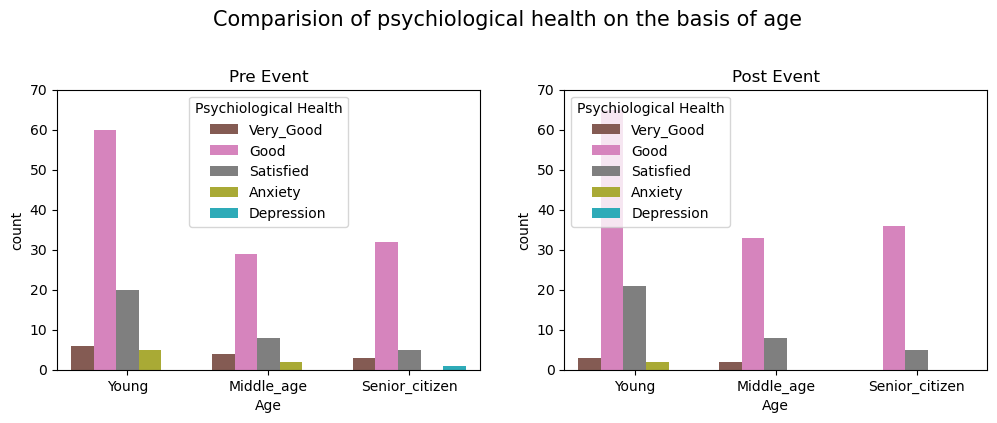

In [13]:
age_div = []
for age in pre_event_data["Age"]:
    if age>=18 and age<30: age_div.append("Young_age")
    elif age>=30 and age<50: age_div.append("Middle_age")
    else: age_div.append("Senior_citizen")


plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.suptitle("Comparision of psychiological health on the basis of age",fontsize=15)
psychiological_health_data_pre = {"Age":age_div,"Psychiological Health":psychiological_health_div("pre","Psychiological Health")}
psychiological_health_data_pre = pd.DataFrame(psychiological_health_data_pre)
fig = sns.countplot(x="Age", data=psychiological_health_data_pre, palette=color_dic ,hue='Psychiological Health', hue_order=order)
fig.set_ylim([0,70])
fig.set_title('Pre Event') 
fig.set_xticklabels(["Young","Middle_age","Senior_citizen"])

plt.subplot(2, 2, 2)
psychiological_health_data_post = {"Age": age_div,"Psychiological Health":psychiological_health_div("post","Psychiological Health.1")}
psychiological_health_data_post = pd.DataFrame(psychiological_health_data_post)
fig = sns.countplot(x="Age", data=psychiological_health_data_post, palette=color_dic ,hue='Psychiological Health', hue_order=order)
fig.set_ylim([0,70])
fig.set_title('Post Event') 
fig.set_xticklabels(["Young","Middle_age","Senior_citizen"])
plt.show()

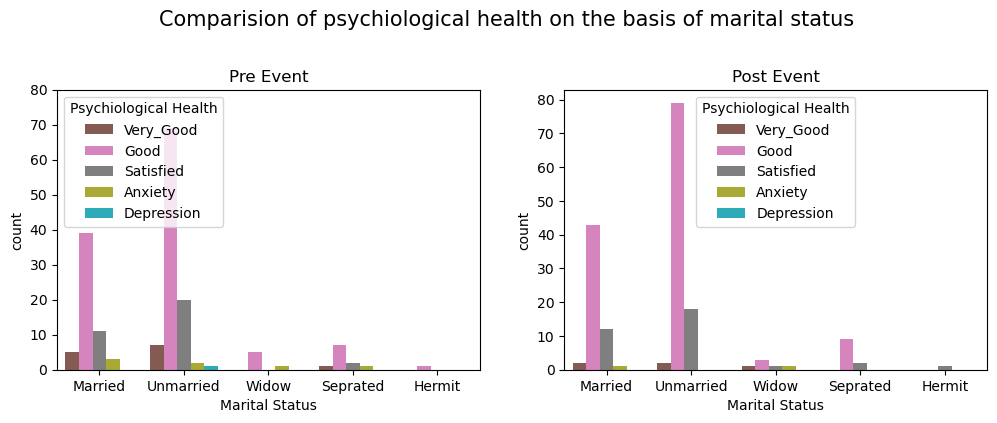

In [14]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.suptitle("Comparision of psychiological health on the basis of marital status",fontsize=15)
psychiological_health_data_pre = {"Marital Status":pre_event_data["Marital Status"],"Psychiological Health":psychiological_health_div("pre","Psychiological Health")}
psychiological_health_data_pre = pd.DataFrame(psychiological_health_data_pre)
fig = sns.countplot(x="Marital Status", data=psychiological_health_data_pre, palette=color_dic ,hue='Psychiological Health',hue_order=order)
fig.set_ylim([0,80])
fig.set_title('Pre Event') 
fig.set_xticklabels(["Married","Unmarried","Widow","Seprated","Hermit"])

plt.subplot(2, 2, 2)
psychiological_health_data_post = {"Marital Status":post_event_data["Marital Status"],"Psychiological Health":psychiological_health_div("post","Psychiological Health.1")}
psychiological_health_data_post = pd.DataFrame(psychiological_health_data_post)
fig = sns.countplot(x="Marital Status", data=psychiological_health_data_post, palette=color_dic,hue='Psychiological Health',hue_order=order)
fig.set_title('Post Event') 
fig.set_xticklabels(["Married","Unmarried","Widow","Seprated","Hermit"])
plt.show()

In [15]:
def social_relationships_div(mode,column):
    social_relationships = []
    if mode == "pre": iterator = pre_event_data[column]
    if mode == "post": iterator = post_event_data[column]
    for points in iterator:
        if points>=0 and points<5: social_relationships.append("Introvert")
        elif points>=5 and points<10: social_relationships.append('Social')
        else: social_relationships.append('Extrovert')
    return social_relationships

color_dic = {"Extrovert":"C3","Social":"C5","Introvert":"C7"}
order = ["Extrovert","Social","Introvert"]

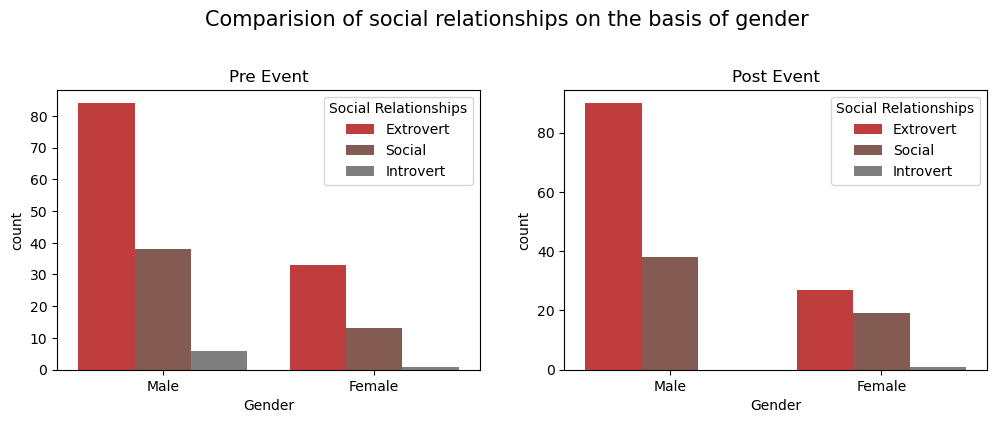

In [16]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.suptitle("Comparision of social relationships on the basis of gender",fontsize=15)
social_relationships_data_pre = {"Gender": pre_event_data["Gender"],"Social Relationships":social_relationships_div("pre","Social Relationships")}
social_relationships_data_pre = pd.DataFrame(social_relationships_data_pre)
fig = sns.countplot(x="Gender", data=social_relationships_data_pre, palette=color_dic,hue='Social Relationships',hue_order=order)
fig.set_title('Pre Event') 
fig.set_xticklabels(["Male","Female"])

plt.subplot(2, 2, 2)
social_relationships_data_post = {"Gender": post_event_data["Gender"],"Social Relationships":social_relationships_div("post","Social Relationships.1")}
social_relationships_data_post = pd.DataFrame(social_relationships_data_post)
fig = sns.countplot(x="Gender", data=social_relationships_data_post, palette=color_dic,hue='Social Relationships',hue_order=order)
fig.set_title('Post Event') 
fig.set_xticklabels(["Male","Female"])
plt.show()

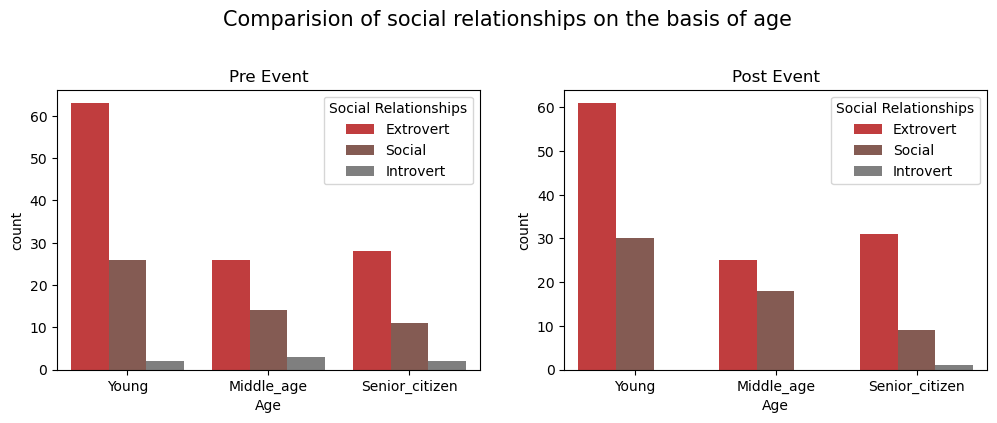

In [17]:
age_div = []
for age in pre_event_data["Age"]:
    if age>=18 and age<30: age_div.append("Young_age")
    elif age>=30 and age<50: age_div.append("Middle_age")
    else: age_div.append("Senior_citizen")


plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.suptitle("Comparision of social relationships on the basis of age",fontsize=15)
social_relationships_data_pre = {"Age":age_div,"Social Relationships":social_relationships_div("pre","Social Relationships")}
social_relationships_data_pre = pd.DataFrame(social_relationships_data_pre)
fig = sns.countplot(x="Age", data=social_relationships_data_pre, palette=color_dic,hue='Social Relationships',hue_order=order)
fig.set_title('Pre Event') 
fig.set_xticklabels(["Young","Middle_age","Senior_citizen"])

plt.subplot(2, 2, 2)
social_relationships_data_post = {"Age": age_div,"Social Relationships":social_relationships_div("post","Social Relationships.1")}
social_relationships_data_post = pd.DataFrame(social_relationships_data_post)
fig = sns.countplot(x="Age", data=social_relationships_data_post, palette=color_dic,hue='Social Relationships',hue_order=order)
fig.set_title('Post Event') 
fig.set_xticklabels(["Young","Middle_age","Senior_citizen"])
plt.show()

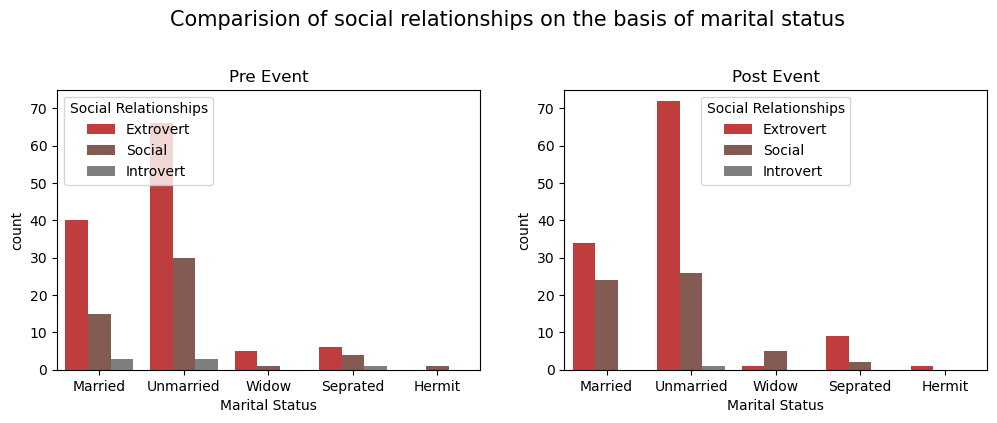

In [18]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.suptitle("Comparision of social relationships on the basis of marital status",fontsize=15)
social_relationships_data_pre = {"Marital Status":pre_event_data["Marital Status"],"Social Relationships":social_relationships_div("pre","Social Relationships")}
social_relationships_data_pre = pd.DataFrame(social_relationships_data_pre)
fig = sns.countplot(x="Marital Status", data=social_relationships_data_pre, palette=color_dic,hue='Social Relationships',hue_order=order)
fig.set_ylim([0,75])
fig.set_title('Pre Event') 
fig.set_xticklabels(["Married","Unmarried","Widow","Seprated","Hermit"])

plt.subplot(2, 2, 2)
social_relationships_data_post = {"Marital Status":post_event_data["Marital Status"],"Social Relationships":social_relationships_div("post","Social Relationships.1")}
social_relationships_data_post = pd.DataFrame(social_relationships_data_post)
fig = sns.countplot(x="Marital Status", data=social_relationships_data_post, palette=color_dic,hue='Social Relationships',hue_order=order)
fig.set_ylim([0,75])
fig.set_title('Post Event') 
fig.set_xticklabels(["Married","Unmarried","Widow","Seprated","Hermit"])
plt.show()

In [19]:
def environmental_relationships_div(mode,column):
    environmental_relationships = []
    if mode == "pre": iterator = pre_event_data[column]
    if mode == "post": iterator = post_event_data[column]
    for points in iterator:
        if points>=0 and points<10: environmental_relationships.append("Poor")
        elif points>=10 and points<20: environmental_relationships.append('Satisfied')
        else: environmental_relationships.append('Highly Satisfied')
    return environmental_relationships

color_dic = {"Highly Satisfied":"C2","Satisfied":"C4","Poor":"C6"}
order = ["Highly Satisfied","Satisfied","Poor"]

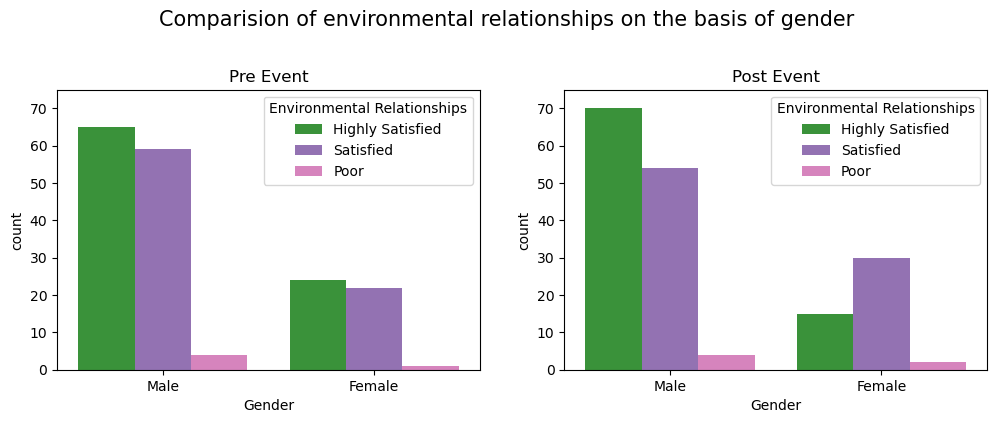

In [20]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.suptitle("Comparision of environmental relationships on the basis of gender",fontsize=15)
environmental_relationships_data_pre = {"Gender": pre_event_data["Gender"],"Environmental Relationships":environmental_relationships_div("pre","Environmental Relationships")}
environmental_relationships_data_pre = pd.DataFrame(environmental_relationships_data_pre)
fig = sns.countplot(x="Gender", data=environmental_relationships_data_pre, palette=color_dic,hue='Environmental Relationships',hue_order=order)
fig.set_ylim([0,75])
fig.set_title('Pre Event') 
fig.set_xticklabels(["Male","Female"])

plt.subplot(2, 2, 2)
environmental_relationships_data_post = {"Gender": post_event_data["Gender"],"Environmental Relationships":environmental_relationships_div("post","Environmental Relationships.1")}
environmental_relationships_data_post = pd.DataFrame(environmental_relationships_data_post)
fig = sns.countplot(x="Gender", data=environmental_relationships_data_post, palette=color_dic,hue='Environmental Relationships',hue_order=order)
fig.set_ylim([0,75])
fig.set_title('Post Event') 
fig.set_xticklabels(["Male","Female"])
plt.show()

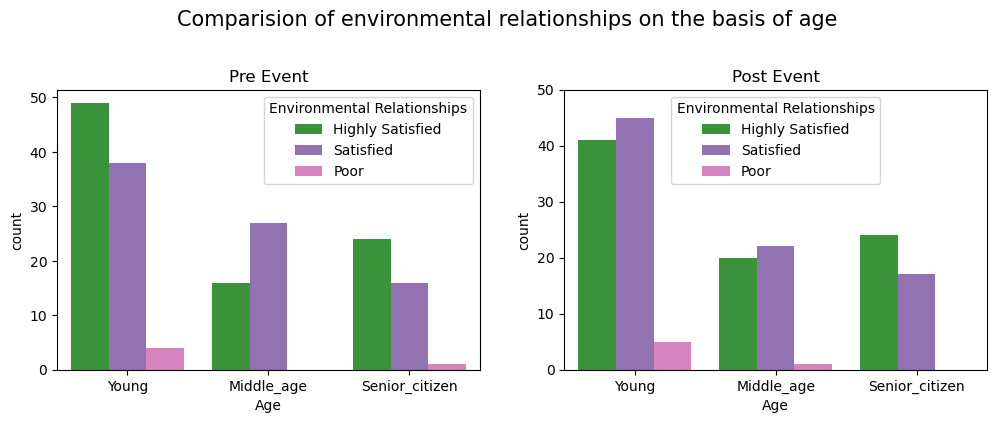

In [21]:
age_div = []
for age in pre_event_data["Age"]:
    if age>=18 and age<30: age_div.append("Young_age")
    elif age>=30 and age<50: age_div.append("Middle_age")
    else: age_div.append("Senior_citizen")


plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.suptitle("Comparision of environmental relationships on the basis of age",fontsize=15)
environmental_relationships_data_pre = {"Age":age_div,"Environmental Relationships":environmental_relationships_div("pre","Environmental Relationships")}
environmental_relationships_data_pre = pd.DataFrame(environmental_relationships_data_pre)
fig = sns.countplot(x="Age", data=environmental_relationships_data_pre, palette=color_dic,hue='Environmental Relationships',hue_order=order)
fig.set_title('Pre Event') 
fig.set_xticklabels(["Young","Middle_age","Senior_citizen"])

plt.subplot(2, 2, 2)
environmental_relationships_data_post = {"Age": age_div,"Environmental Relationships":environmental_relationships_div("post","Environmental Relationships.1")}
environmental_relationships_data_post = pd.DataFrame(environmental_relationships_data_post)
fig = sns.countplot(x="Age", data=environmental_relationships_data_post, palette=color_dic,hue='Environmental Relationships',hue_order=order)
fig.set_ylim([0,50])
fig.set_title('Post Event') 
fig.set_xticklabels(["Young","Middle_age","Senior_citizen"])
plt.show()

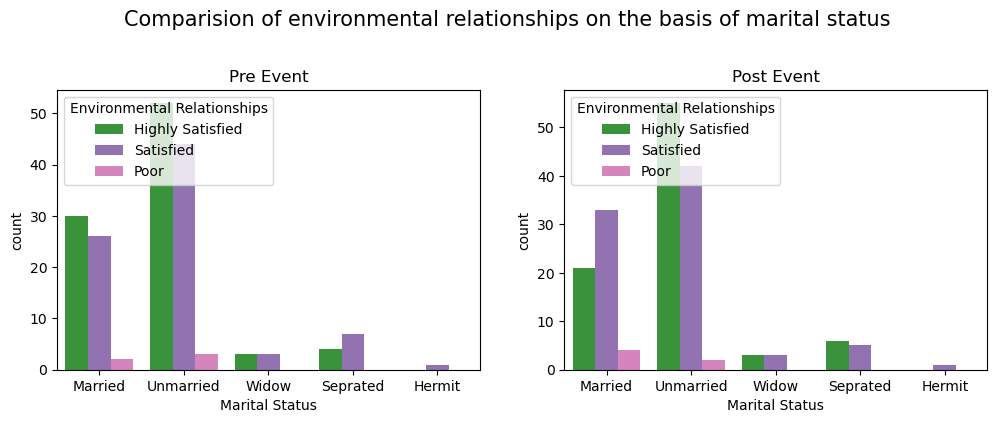

In [23]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.suptitle("Comparision of environmental relationships on the basis of marital status",fontsize=15)
environmental_relationships_data_pre = {"Marital Status":pre_event_data["Marital Status"],"Environmental Relationships":environmental_relationships_div("pre","Environmental Relationships")}
environmental_relationships_data_pre = pd.DataFrame(environmental_relationships_data_pre)
fig = sns.countplot(x="Marital Status", data=environmental_relationships_data_pre, palette=color_dic,hue='Environmental Relationships',hue_order=order)
fig.set_title('Pre Event') 
fig.set_xticklabels(["Married","Unmarried","Widow","Seprated","Hermit"])

plt.subplot(2, 2, 2)
environmental_relationships_data_post = {"Marital Status":post_event_data["Marital Status"],"Environmental Relationships":environmental_relationships_div("post","Environmental Relationships.1")}
environmental_relationships_data_post = pd.DataFrame(environmental_relationships_data_post)
fig = sns.countplot(x="Marital Status", data=environmental_relationships_data_post, palette=color_dic,hue='Environmental Relationships',hue_order=order)
fig.set_title('Post Event') 
fig.set_xticklabels(["Married","Unmarried","Widow","Seprated","Hermit"])
plt.show()

In [24]:
from collections import Counter

In [26]:
data_psychiological_health_1 = psychiological_health_div("pre","Psychiological Health")
data_physical_health_1 = physical_health_div("pre","Physical Health")
data_social_relationships_1 = social_relationships_div("pre","Social Relationships")
data_environmental_relationships_1 = environmental_relationships_div("pre","Environmental Relationships")
print(Counter(data_psychiological_health_1))
print(Counter(data_physical_health_1))
print(Counter(data_social_relationships_1))
print(Counter(data_environmental_relationships_1))

Counter({'Good': 121, 'Satisfied': 33, 'Very_Good': 13, 'Anxiety': 7, 'Depression': 1})
Counter({'Satisfactory': 60, 'Lazy': 45, 'Very_lazy': 34, 'Active': 26, 'Very_active': 10})
Counter({'Extrovert': 117, 'Social': 51, 'Introvert': 7})
Counter({'Highly Satisfied': 89, 'Satisfied': 81, 'Poor': 5})


In [28]:
data_psychiological_health_2 = psychiological_health_div("post","Psychiological Health.1")
data_physical_health_2 = physical_health_div("post","Physical Health.1")
data_social_relationships_2 = social_relationships_div("post","Social Relationships.1")
data_environmental_relationships_2 = environmental_relationships_div("post","Environmental Relationships.1")
print(Counter(data_psychiological_health_2))
print(Counter(data_physical_health_2))
print(Counter(data_social_relationships_2))
print(Counter(data_environmental_relationships_2))

Counter({'Good': 134, 'Satisfied': 34, 'Very_Good': 5, 'Anxiety': 2})
Counter({'Satisfactory': 76, 'Lazy': 49, 'Active': 28, 'Very_lazy': 19, 'Very_active': 3})
Counter({'Extrovert': 117, 'Social': 57, 'Introvert': 1})
Counter({'Highly Satisfied': 85, 'Satisfied': 84, 'Poor': 6})


<AxesSubplot:>

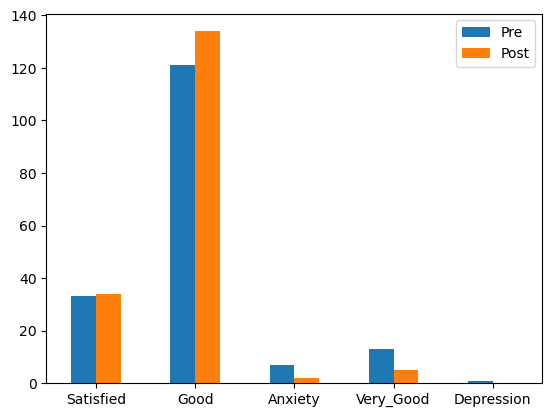

In [29]:
psychiological_table = pd.DataFrame({"Pre":Counter(data_psychiological_health_1),"Post":Counter(data_psychiological_health_2)})
psychiological_table.plot.bar(rot=0)

<AxesSubplot:>

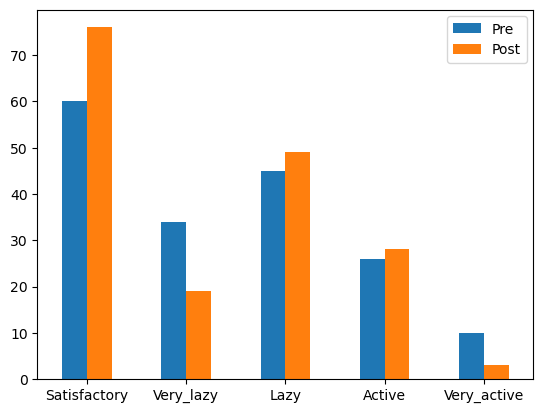

In [30]:
physical_table = pd.DataFrame({"Pre":Counter(data_physical_health_1),"Post":Counter(data_physical_health_2)})
physical_table.plot.bar(rot=0)

<AxesSubplot:>

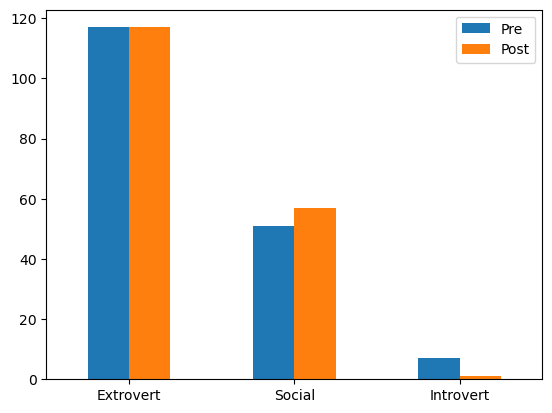

In [33]:
social_relationships_table = pd.DataFrame({"Pre":Counter(data_social_relationships_1),"Post":Counter(data_social_relationships_2)})
social_relationships_table.plot.bar(rot=0)

<AxesSubplot:>

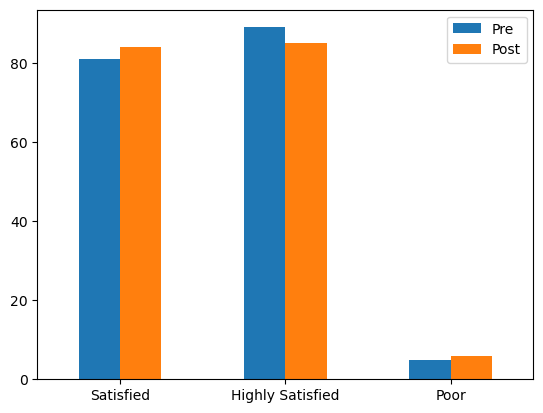

In [35]:
environmental_relationships_table = pd.DataFrame({"Pre":Counter(data_environmental_relationships_1),"Post":Counter(data_environmental_relationships_2)})
environmental_relationships_table.plot.bar(rot=0)